In [24]:
import pandas as pd

import pickle
from sklearn.metrics import *
import os
import itertools
import matplotlib.pyplot as plt
import seaborn as sns

## Closed set multiclass on train and dev

Train on 75% of train set

Grid search on 25$ of train set

Eval on dev set

In [25]:
result_root_path = '/nas/home/cborrelli/bot_speech/results/closed_set_multiclass_train_dev'


In [26]:
nfft_list = [512, 256, 128]
hop_size_list = [256, 128, 64]
selected_features = ['lpc', 'bicoh', 'unet']
#selected_features = ['bicoh']
number_lpc_order = 49
stop_lpc_order = 50
normalizers_keys = ["minmax", "zscore", "l2"]
classifiers_keys = ["svm", "rf"]


In [27]:
results_df = pd.DataFrame(columns=['nfft', 'hop_size', 'selected_features', 'number_lpc_order', 'stop_lpc_order', 
                                   'normalization', 'classifier', 
                                   'accuracy_train', 'accuracy_dev','accuracy_eval',
                                   'cm_train','cm_dev','cm_eval',
                                   'model_params' ])

for fft_params in zip(nfft_list, hop_size_list):
    nfft = fft_params[0]
    hop_size = fft_params[1]
    for c in classifiers_keys:
        for n in normalizers_keys:
            result_name = "class_{}_norm_{}_nfft_{}_hop-size_{}_numberlpcorder_{}_stoplpcorder_{}".format(
                    c, n, nfft, hop_size,
                    number_lpc_order,
                    stop_lpc_order)

            result_name = result_name + "_selected_features_" + "-".join(
                s for s in selected_features) + ".npy"

            result_filename = os.path.join(result_root_path, result_name)

            if os.path.exists(result_filename):
                result_dict = pickle.load(open(result_filename, "rb" ))
                cm_train = confusion_matrix(result_dict['y_train'], result_dict['y_predict_train'],
                                           normalize='true')
                cm_dev = confusion_matrix(result_dict['y_dev'], result_dict['y_predict_dev'],
                                         normalize='true')
                cm_eval = confusion_matrix(result_dict['y_eval'], result_dict['y_predict_eval'],
                                          normalize='true')

                acc_train = balanced_accuracy_score(result_dict['y_train'], result_dict['y_predict_train'])
                acc_dev = balanced_accuracy_score(result_dict['y_dev'], result_dict['y_predict_dev'])
                acc_eval = balanced_accuracy_score(result_dict['y_eval'], result_dict['y_predict_eval'])


                results_df.loc[len(results_df.index)] = [nfft, hop_size, selected_features, 
                                                       number_lpc_order, stop_lpc_order,
                                                       n, c, 
                                                       acc_train, acc_dev, acc_eval,
                                                       cm_train, cm_dev, cm_eval, result_dict['best_model']]
                        


In [28]:
results_df

,nfft,hop_size,selected_features,number_lpc_order,stop_lpc_order,normalization,classifier,accuracy_train,accuracy_dev,accuracy_eval,cm_train,cm_dev,cm_eval,model_params
0,512,256,"[lpc, bicoh, unet]",49,50,minmax,svm,0.981028,0.951832,0.923165,"[[0.9582893347412883, 0.0015839493136219642, 0...","[[0.8878205128205128, 0.00641025641025641, 0.0...","[[0.8105088953247828, 0.011170872983036822, 0....","{'class__C': 1000, 'class__gamma': 0.01, 'clas..."
1,512,256,"[lpc, bicoh, unet]",49,50,zscore,svm,0.998437,0.958590,0.937448,"[[0.996832101372756, 0.0, 0.0, 0.0, 0.00316789...","[[0.9294871794871795, 0.004807692307692308, 0....","[[0.8911874224244932, 0.008688456764584195, 0....","{'class__C': 100, 'class__gamma': 1, 'class__k..."
2,512,256,"[lpc, bicoh, unet]",49,50,l2,svm,0.616425,0.585976,0.548663,"[[0.5332629355860612, 0.036430834213305174, 0....","[[0.47435897435897434, 0.03205128205128205, 0....","[[0.4724865535788167, 0.033512618949110465, 0....","{'class__C': 1000, 'class__gamma': 1, 'class__..."
3,512,256,"[lpc, bicoh, unet]",49,50,minmax,rf,1.000000,0.831303,0.798358,"[[1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [0.0, 1....","[[0.48717948717948717, 0.03205128205128205, 0....","[[0.40215142738932563, 0.04054613156805958, 0....","{'class__max_depth': 30, 'class__min_samples_l..."
4,512,256,"[lpc, bicoh, unet]",49,50,zscore,rf,1.000000,0.830218,0.795971,"[[1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [0.0, 1....","[[0.47435897435897434, 0.03685897435897436, 0....","[[0.3934629706247414, 0.04344228382292098, 0.0...","{'class__max_depth': 30, 'class__min_samples_l..."
5,512,256,"[lpc, bicoh, unet]",49,50,l2,rf,1.000000,0.575315,0.575701,"[[1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [0.0, 1....","[[0.14903846153846154, 0.05929487179487179, 0....","[[0.10302027306578403, 0.06950765411667356, 0....","{'class__max_depth': None, 'class__min_samples..."
6,256,128,"[lpc, bicoh, unet]",49,50,minmax,svm,0.982580,0.954843,0.926244,"[[0.9577613516367476, 0.0015839493136219642, 0...","[[0.8846153846153846, 0.00641025641025641, 0.0...","[[0.8088539511791477, 0.009515928837401738, 0....","{'class__C': 1000, 'class__gamma': 0.01, 'clas..."
7,256,128,"[lpc, bicoh, unet]",49,50,zscore,svm,0.998210,0.961170,0.936693,"[[0.9952481520591341, 0.0, 0.0, 0.0, 0.0047518...","[[0.9246794871794872, 0.003205128205128205, 0....","[[0.8911874224244932, 0.01075713694662805, 0.0...","{'class__C': 100, 'class__gamma': 1, 'class__k..."
8,256,128,"[lpc, bicoh, unet]",49,50,l2,svm,0.613139,0.585397,0.547266,"[[0.5332629355860612, 0.036430834213305174, 0....","[[0.49038461538461536, 0.03205128205128205, 0....","[[0.47662391394290443, 0.033098882912701695, 0...","{'class__C': 1000, 'class__gamma': 1, 'class__..."
9,256,128,"[lpc, bicoh, unet]",49,50,minmax,rf,1.000000,0.843279,0.806151,"[[1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [0.0, 1....","[[0.46314102564102566, 0.035256410256410256, 0...","[[0.37691352916839055, 0.03847745138601572, 0....","{'class__max_depth': 30, 'class__min_samples_l..."


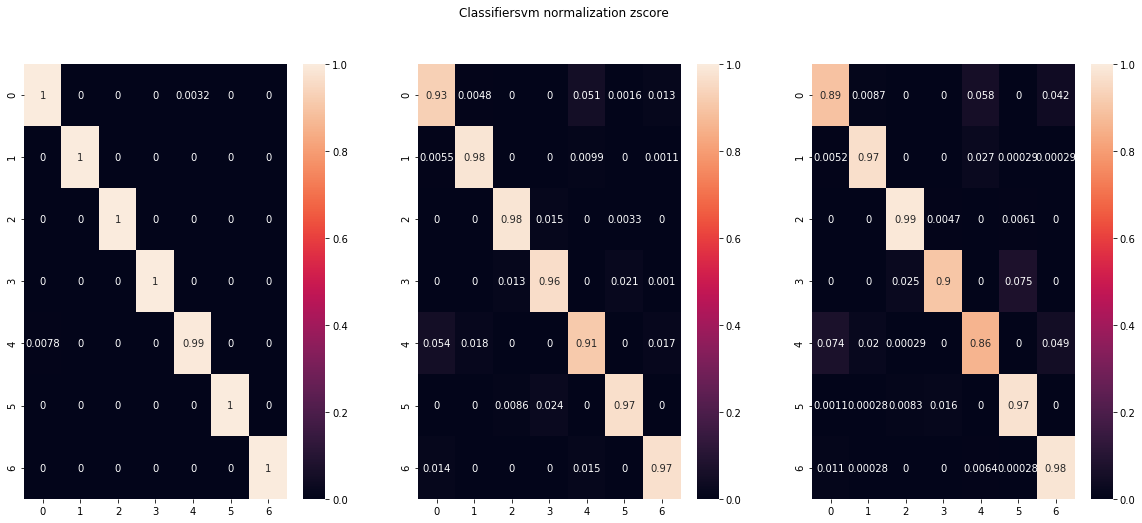

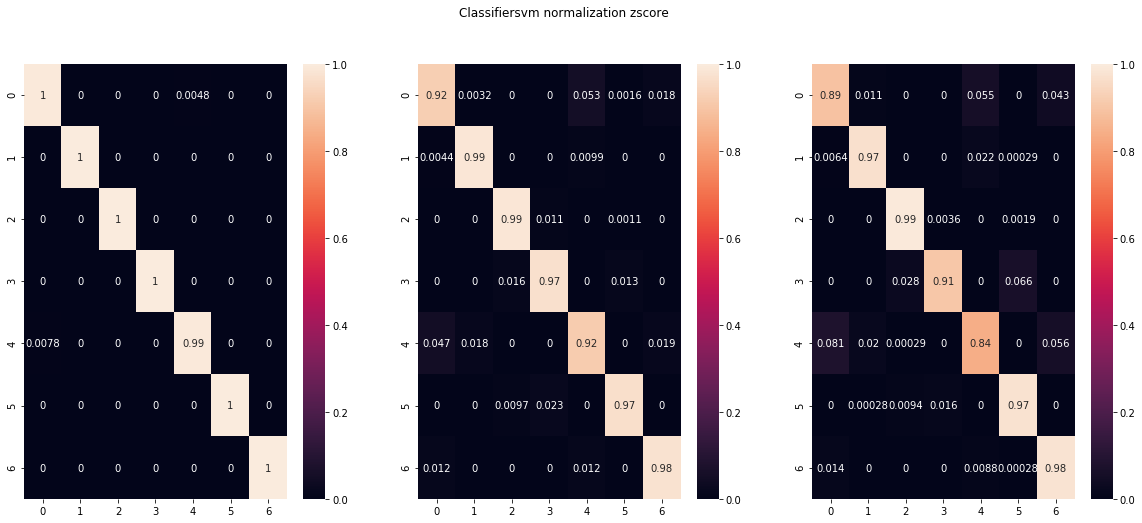

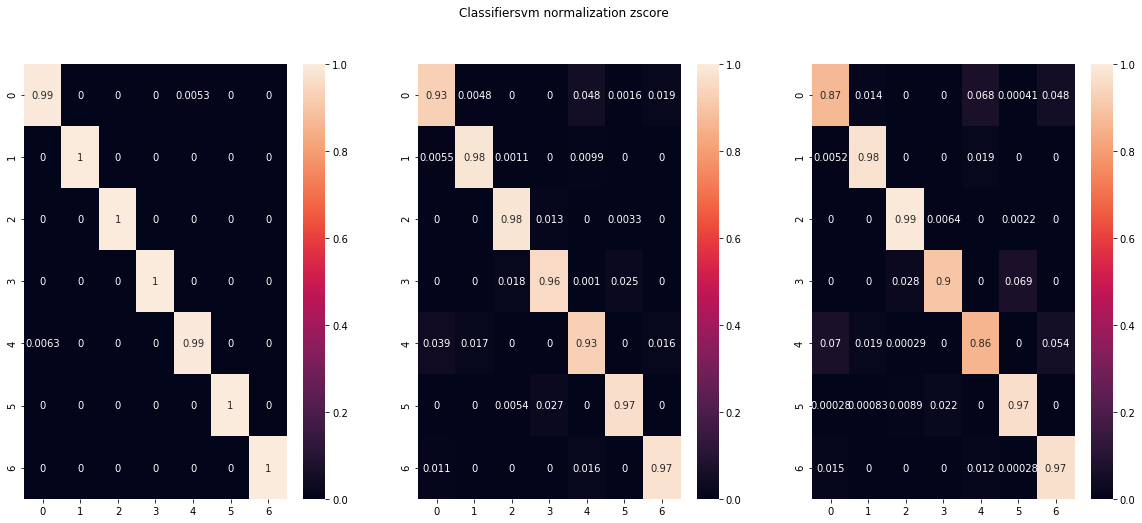

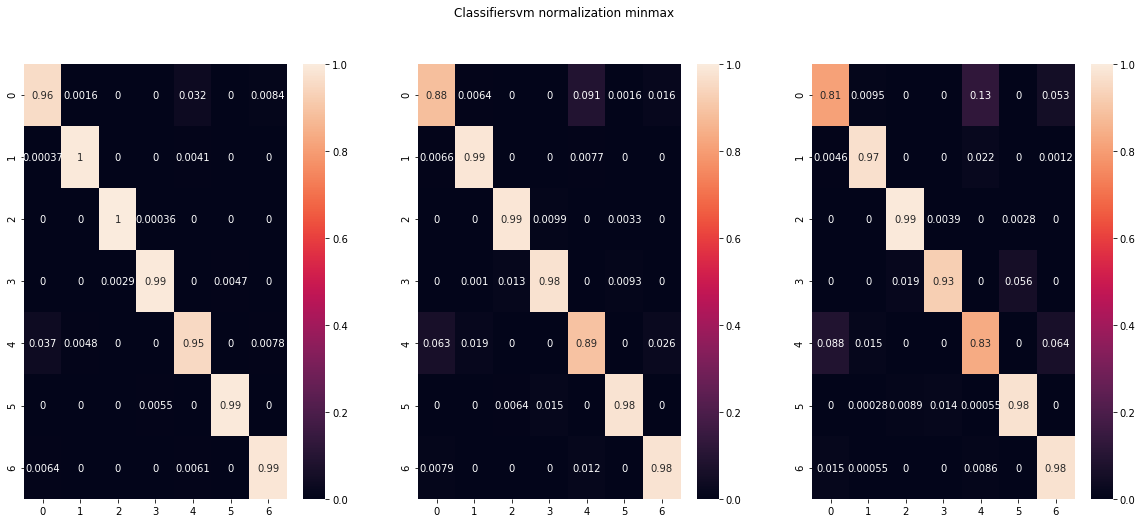

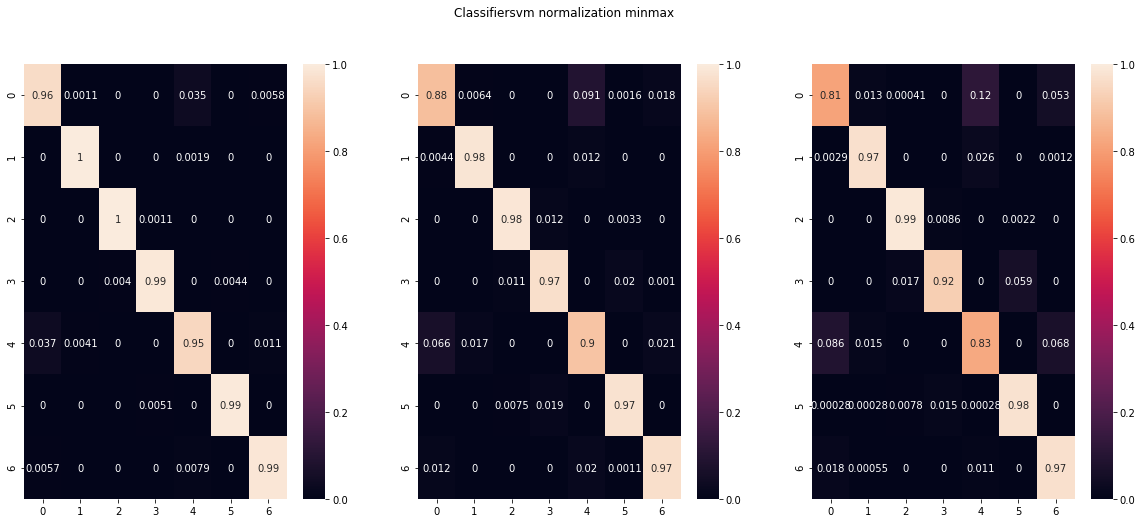

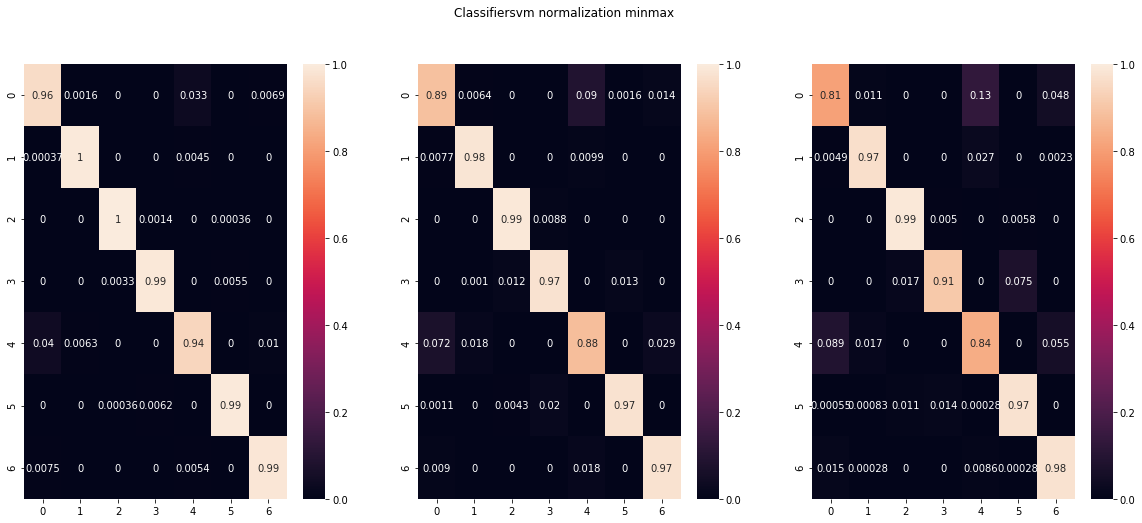

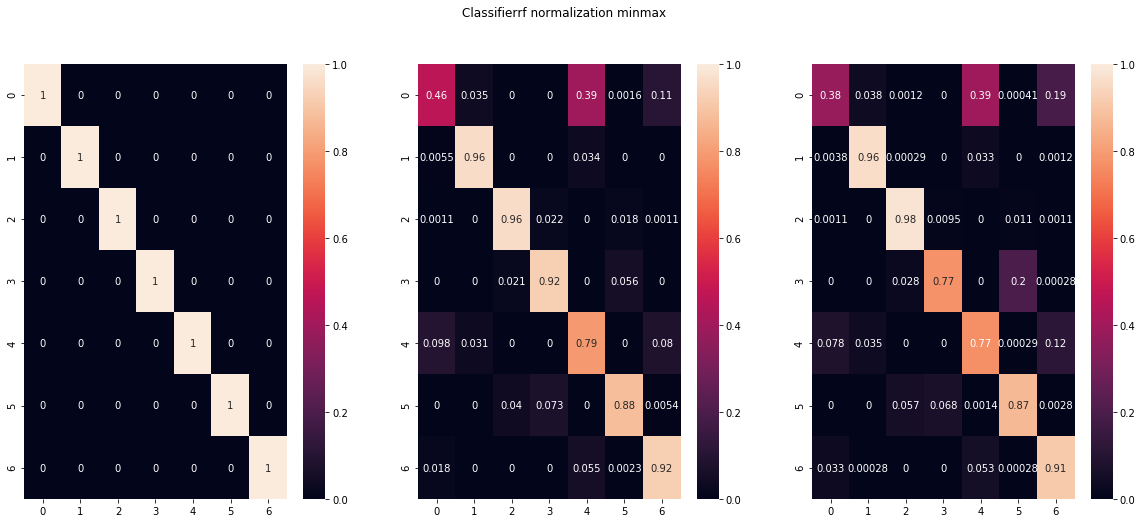

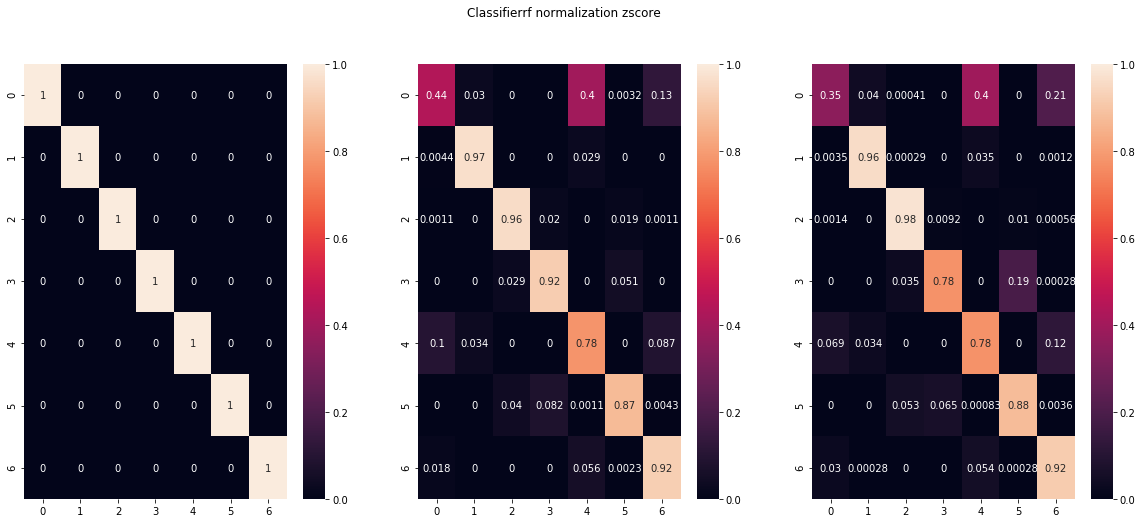

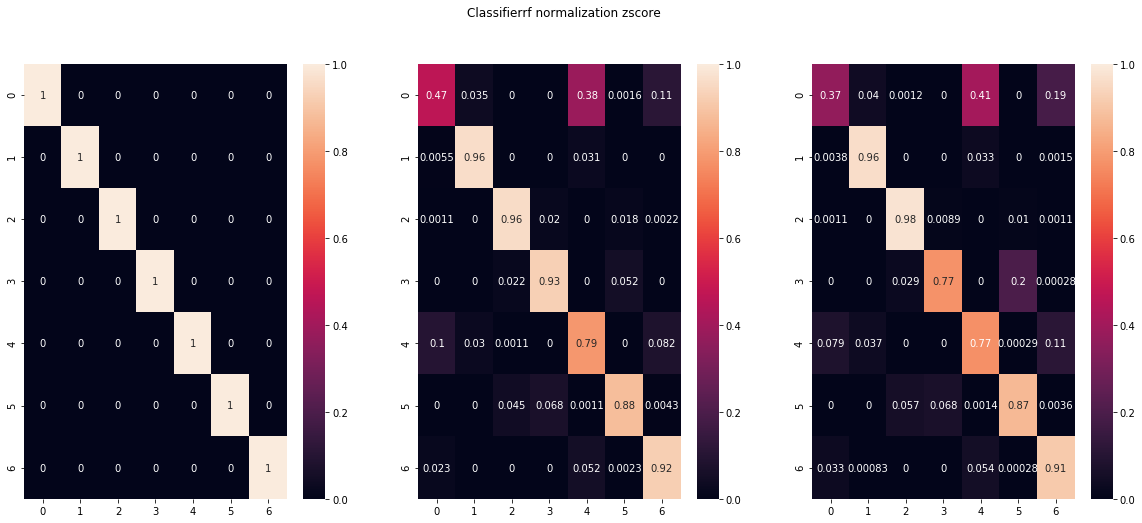

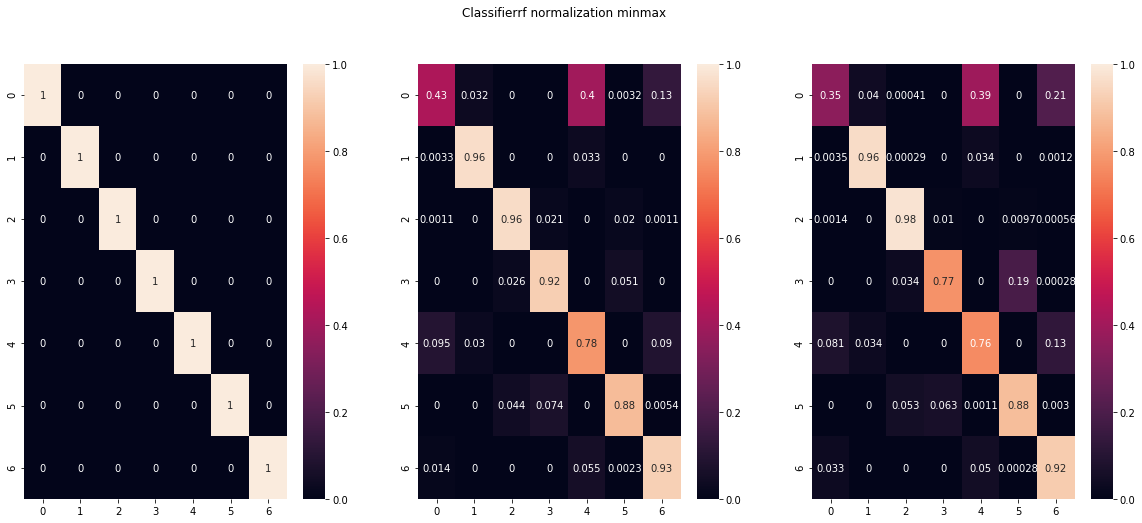

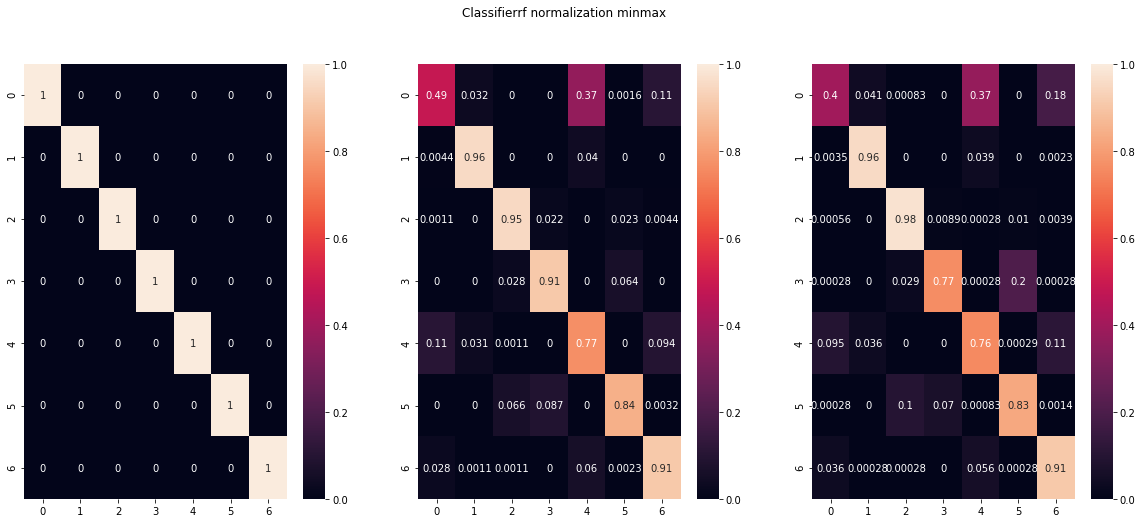

In [32]:
results_df.sort_values('accuracy_eval', ascending=False, inplace=True)
results_df.reset_index(inplace=True, drop=True)
for index, row in results_df.iterrows():
    if index > 10:
        break
        
    plt.figure(figsize = (20,8))
    plt.suptitle("Classifier{} normalization {}".format(row['classifier'], row['normalization']))

    plt.subplot(131)
    sns.heatmap(row['cm_train'], annot=True, vmin=0, vmax=1)
    
    plt.subplot(132)
    sns.heatmap(row['cm_dev'], annot=True, vmin=0, vmax=1)
    
    plt.subplot(133)
    sns.heatmap(row['cm_eval'], annot=True, vmin=0, vmax=1)
    
    plt.show()

In [30]:
results_df.sort_values('accuracy_eval', ascending=False, inplace=True)

for index, row in results_df.iterrows():
    #if row['classifier'] == 'svm':
    if True:
        print("Classifier {} normalization {}".format(row['classifier'], row['normalization']))
        print("NFFT {} Hop Size {}".format(row['nfft'], row['hop_size']))
        print("Acc train {} Acc dev {} Acc eval {}".format(row['accuracy_train'],
                                                           row['accuracy_dev'],
                                                           row['accuracy_eval']))

Classifier svm normalization zscore
NFFT 512 Hop Size 256
Acc train 0.9984367433124142 Acc dev 0.9585899134797765 Acc eval 0.9374481552303605
Classifier svm normalization zscore
NFFT 256 Hop Size 128
Acc train 0.9982104648390396 Acc dev 0.9611703562409996 Acc eval 0.936692833415182
Classifier svm normalization zscore
NFFT 128 Hop Size 64
Acc train 0.9983466005366456 Acc dev 0.959827332666837 Acc eval 0.9337128274852827
Classifier svm normalization minmax
NFFT 256 Hop Size 128
Acc train 0.9825795067388172 Acc dev 0.9548433090013263 Acc eval 0.9262443371533149
Classifier svm normalization minmax
NFFT 128 Hop Size 64
Acc train 0.9822210840696872 Acc dev 0.9505855697937279 Acc eval 0.9249126987283149
Classifier svm normalization minmax
NFFT 512 Hop Size 256
Acc train 0.9810280201908422 Acc dev 0.9518318036399854 Acc eval 0.9231645420312109
Classifier rf normalization minmax
NFFT 256 Hop Size 128
Acc train 1.0 Acc dev 0.8432793268966728 Acc eval 0.8061506785960164
Classifier rf normalizatio

In [ ]:
results_df